Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data types before conversion:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Data types after conversion:
 age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

Number of duplicate rows: 723

Outliers in 'chol':
      age sex cp  trestbps  chol fbs restecg  

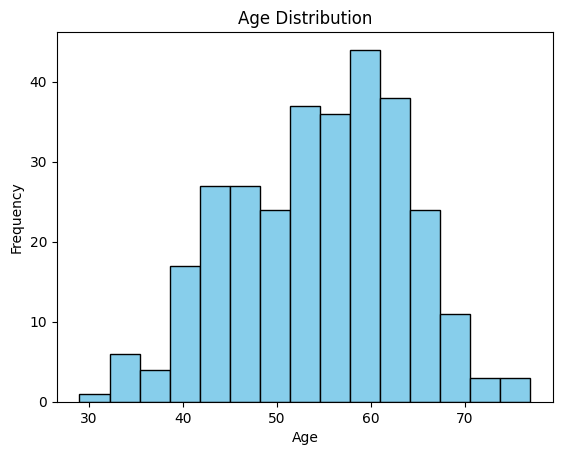

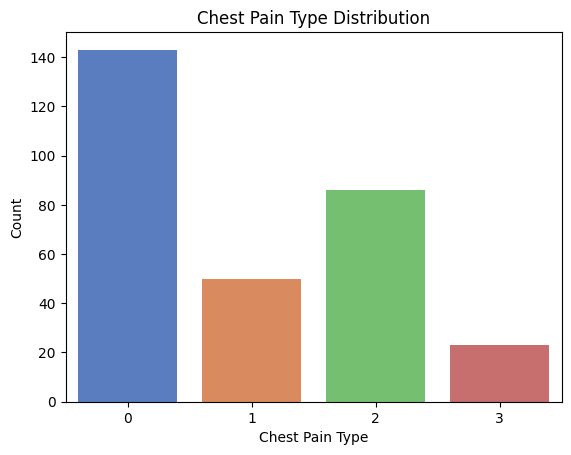

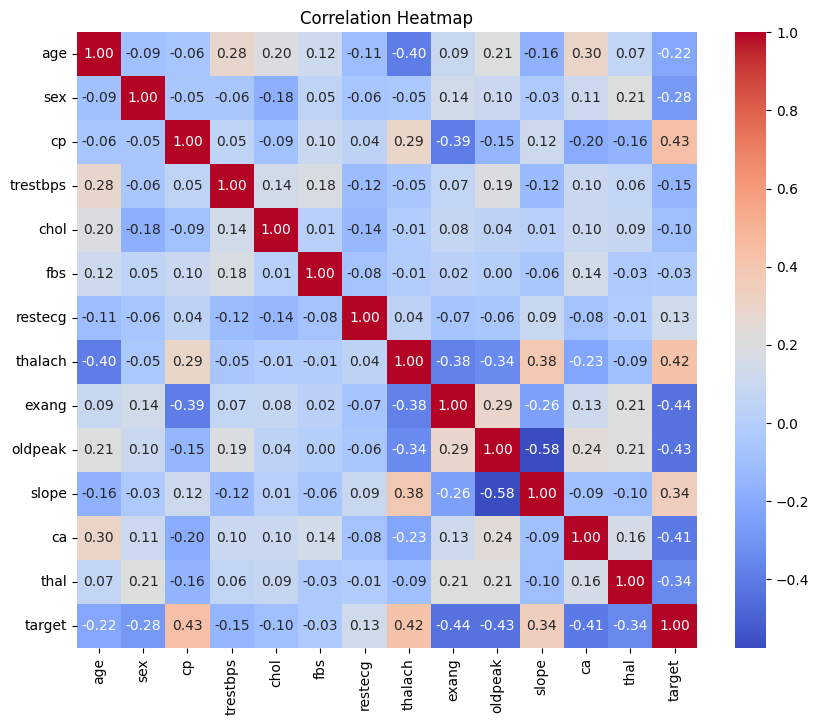

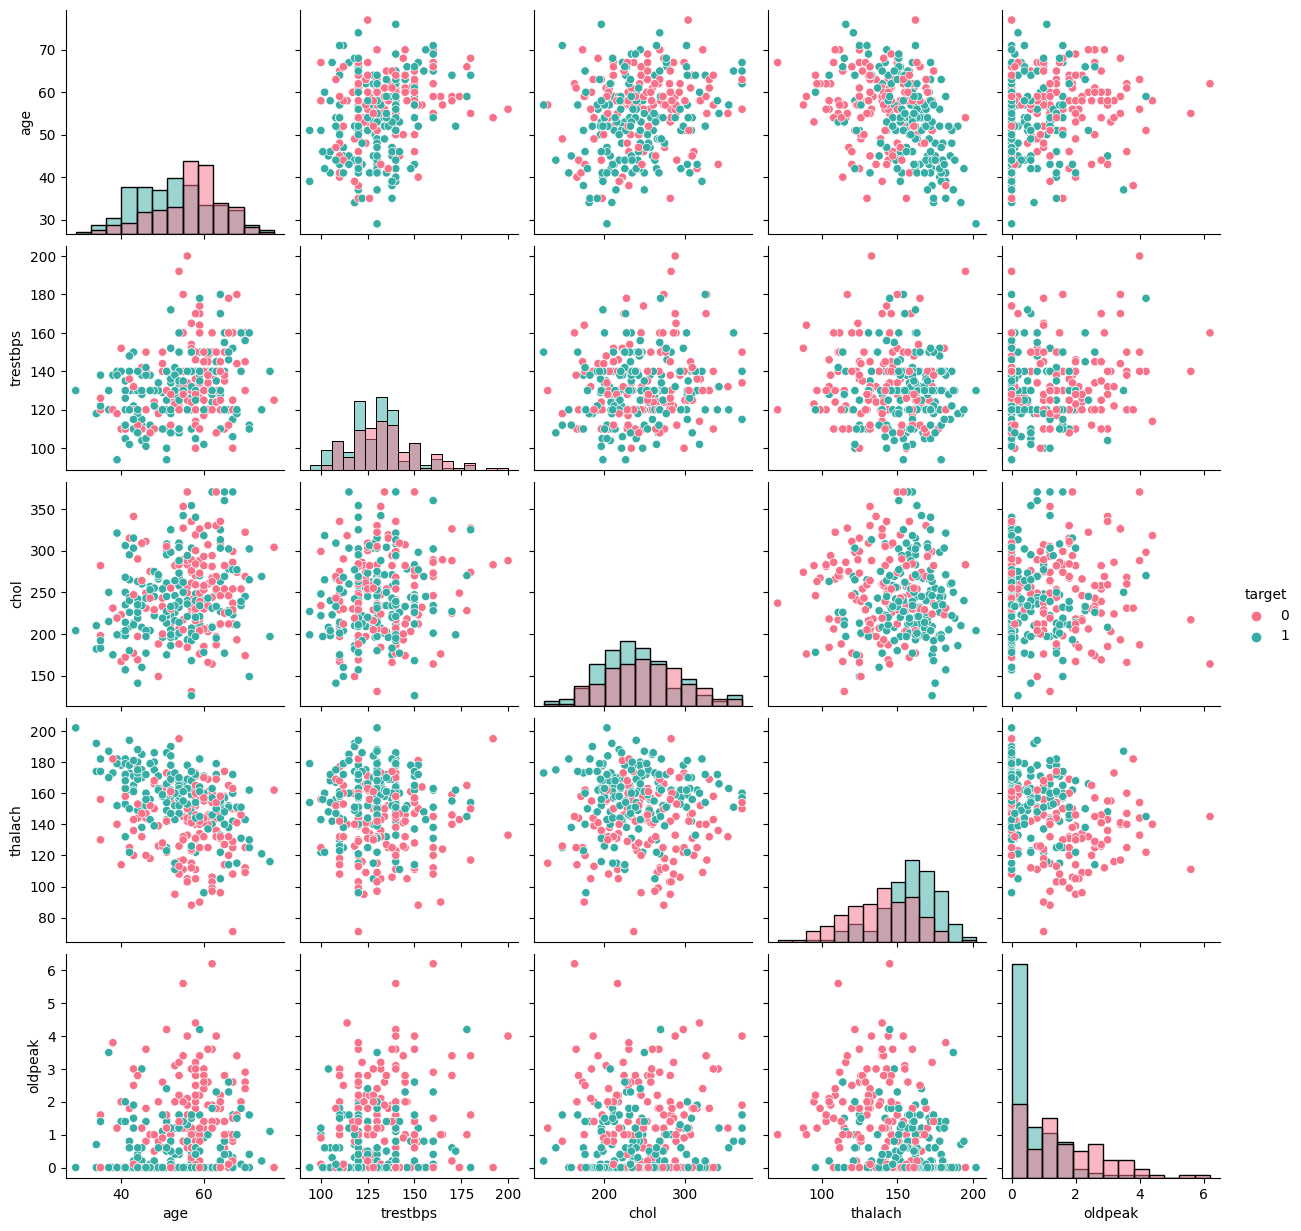


High Cholesterol Patients (chol > 240):
      age   chol target
4     62  294.0      0
5     58  248.0      1
6     58  318.0      0
7     55  289.0      0
8     46  249.0      0
..   ...    ...    ...
629   65  282.0      0
691   55  250.0      1
720   64  335.0      0
739   52  255.0      0
843   59  273.0      0

[151 rows x 3 columns]

Mean Cholesterol by Gender:
 sex
0    257.769531
1    239.601942
Name: chol, dtype: float64

Pivot Table - Mean Cholesterol by Gender and Target:
 target           0           1
sex                           
0       271.822917  253.085069
1       246.061404  231.597826


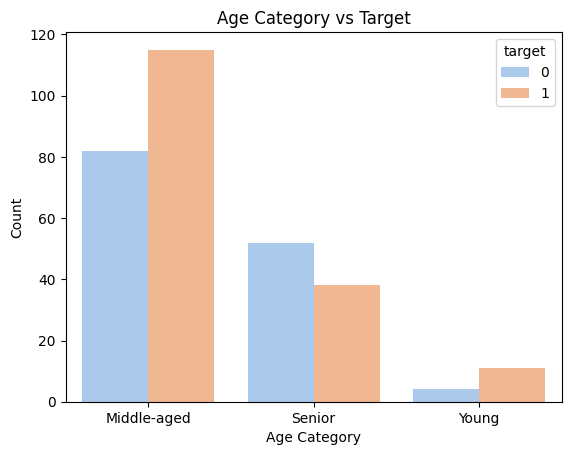


Conclusion: The dataset reveals several trends, such as...


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\manas\OneDrive\Рабочий стол\Algorithm\heart.csv')

# 1. Data Cleaning (20%)
## Check for missing values
print("Missing values per column:\n", df.isnull().sum())

## Check data types and correct if necessary
print("\nData types before conversion:\n", df.dtypes)

# Convert categorical-like numerical columns to 'category'
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nData types after conversion:\n", df.dtypes)

## Check for duplicates and remove them
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

## Outlier detection and handling (using IQR method)
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers = detect_outliers('chol')
print("\nOutliers in 'chol':\n", outliers)

# Cap outliers in 'chol'
Q1, Q3 = df['chol'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['chol'] = np.where(df['chol'] > upper_bound, upper_bound, np.where(df['chol'] < lower_bound, lower_bound, df['chol']))

# 2. Exploratory Data Analysis (30%)
## Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

## Categorical analysis
print("\nChest Pain Type (cp) Frequency:\n", df['cp'].value_counts())

# Visualization
### Histogram for age
plt.hist(df['age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Bar chart for chest pain type
sns.countplot(data=df, x='cp', palette='muted')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

### Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Pairplot
sns.pairplot(df, hue='target', diag_kind='hist', palette='husl')
plt.show()

# 3. Data Transformation and Feature Engineering (20%)
## Create new features
df['chol_age_ratio'] = df['chol'] / df['age']
df['bp_diff'] = df['trestbps'] - df['thalach']  # Difference between resting BP and max heart rate

## Sorting and filtering
high_chol_patients = df[df['chol'] > 240]
print("\nHigh Cholesterol Patients (chol > 240):\n", high_chol_patients[['age', 'chol', 'target']])

## Aggregating data with groupby
mean_chol_by_gender = df.groupby('sex')['chol'].mean()
print("\nMean Cholesterol by Gender:\n", mean_chol_by_gender)

# 4. Advanced Pandas Features (Optional, Extra Credit)
## Pivot table
pivot_table = df.pivot_table(values='chol', index='sex', columns='target', aggfunc='mean')
print("\nPivot Table - Mean Cholesterol by Gender and Target:\n", pivot_table)

## Apply custom function
def categorize_age(age):
    if age < 40:
        return 'Young'
    elif 40 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

df['age_category'] = df['age'].apply(categorize_age)

# Visualize new feature
sns.countplot(data=df, x='age_category', hue='target', palette='pastel')
plt.title('Age Category vs Target')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

# 5. Conclusion
print("\nConclusion: The dataset reveals several trends, such as...")
